In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
train = pd.read_csv("heart.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
train = train.dropna()

In [24]:
train["age"] = train["age"].apply(round)
train["age"].head()
train["thalach"] = train["thalach"].apply(round)
train["thalach"].head()

0    150
1    187
2    172
3    178
4    163
Name: thalach, dtype: int64

In [25]:
X = train['age'].values
y = train['thalach'].values

In [26]:
X=X.reshape(-1,1)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (242, 1)
y_train shape (242,)
X_test shape (61, 1)
y_test shape (61,)
[163 141 154 163 173 140 147 132 171 181 130 150 120 194 114 158 171 105
 125 126 132 158 146 179 173 120 132 123 103 131 152 179  88 155 142 158
 146 180 192 162 160 125 158 169  99 184 131 130 133 165 160 143 163 129
 174 156 187 137 186 161 106]


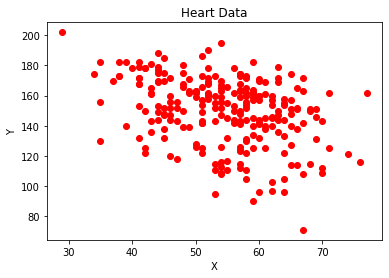

In [28]:
%matplotlib inline
plt.scatter(x_train,y_train,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heart Data')
plt.show()

In [29]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 13.02 %
Test accuracy 24.3 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

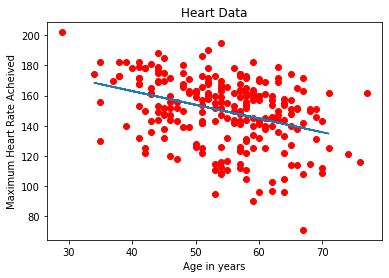

In [30]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("Age in years")
plt.ylabel("Maximum Heart Rate Acheived")
plt.title("Heart Data")
plt.plot

I noticed the older the poeple in the data are the lower their maxiumum heart rate is.  This may be affected by their age or outside factors as people age, eg. diet, excercise and medications taken.